<a href="https://colab.research.google.com/github/Mohid43/Water-Potability/blob/main/Uas_Bemcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mohammad Hidayatnor

Nim  : A11.2019.12335

link YT : https://youtu.be/kfBQk2i6o2c?si=JsqA2WXdPZoqv9sG


**PENGUMPULAN DATA**

Import data dari drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
file_path = '/content/drive/MyDrive/water_potability.csv'
water_data = pd.read_csv(file_path)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**MENELAAH,VALIDASI dan VISUALISASI DATA**

In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_data.nunique()

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


**MENENTUKAN OBJEK DATA**

In [ ]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
missing_values = water_data.isnull().sum()

In [ ]:
water_data_imputed = water_data.fillna(water_data.mean())

In [ ]:
Q1 = water_data_imputed.quantile(0.25)
Q3 = water_data_imputed.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = ((water_data_imputed < lower_bound) | (water_data_imputed > upper_bound))

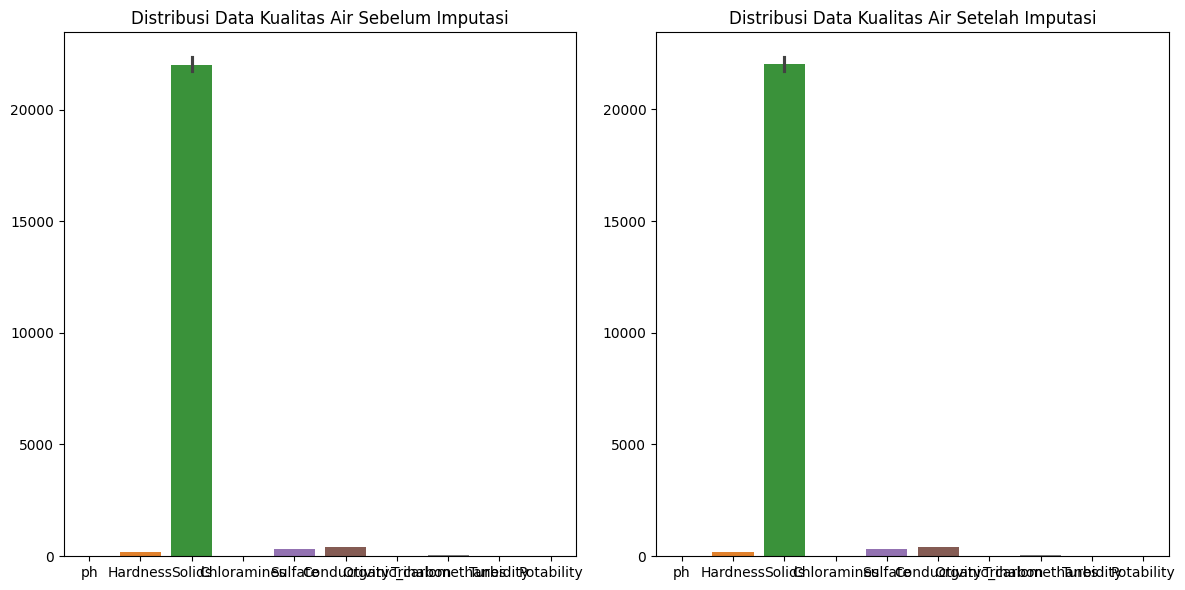

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.barplot(data=water_data)
plt.title('Distribusi Data Kualitas Air Sebelum Imputasi')

plt.subplot(1, 2, 2)

sns.barplot(data=water_data_imputed)
plt.title('Distribusi Data Kualitas Air Setelah Imputasi')

plt.tight_layout()
plt.show()


**MEMBESIHKAN DATA**

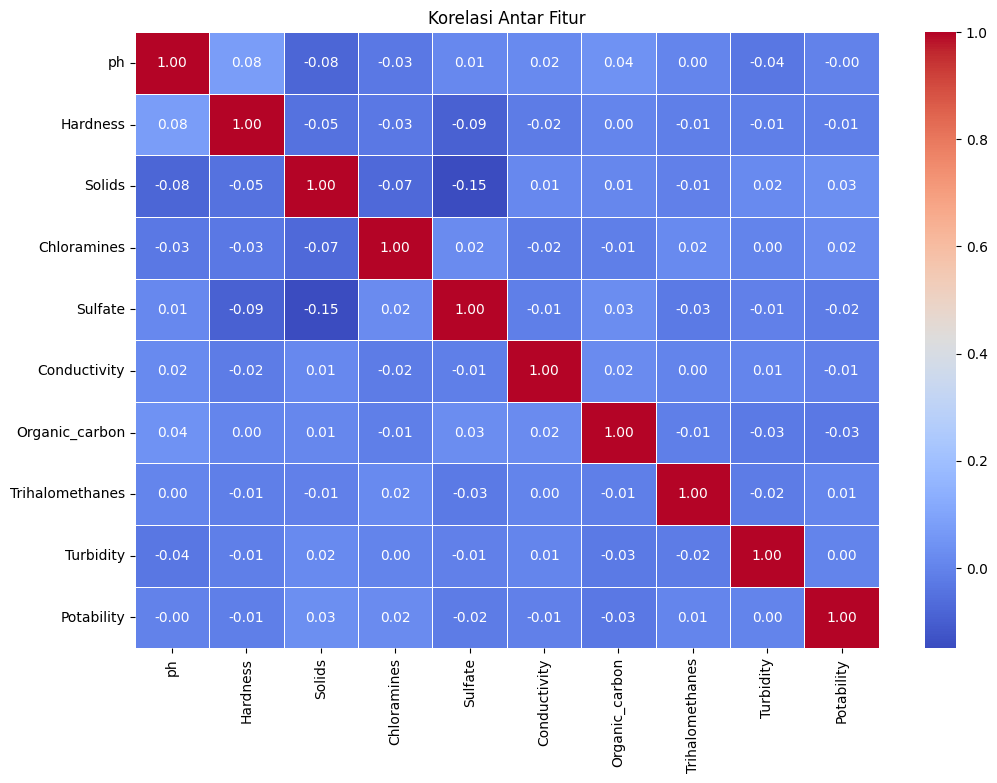

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(water_data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

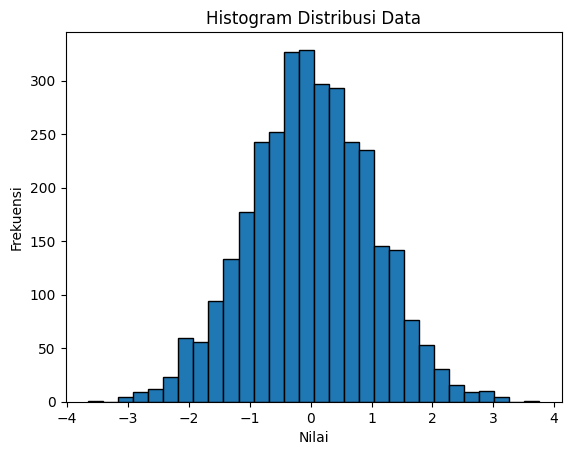

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib to use plotting functions
import numpy as np

data = np.random.randn(len(water_data))

# Membuat histogram
plt.hist(data, bins=30, edgecolor='black')

# Menambahkan judul dan label
plt.title('Histogram Distribusi Data')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

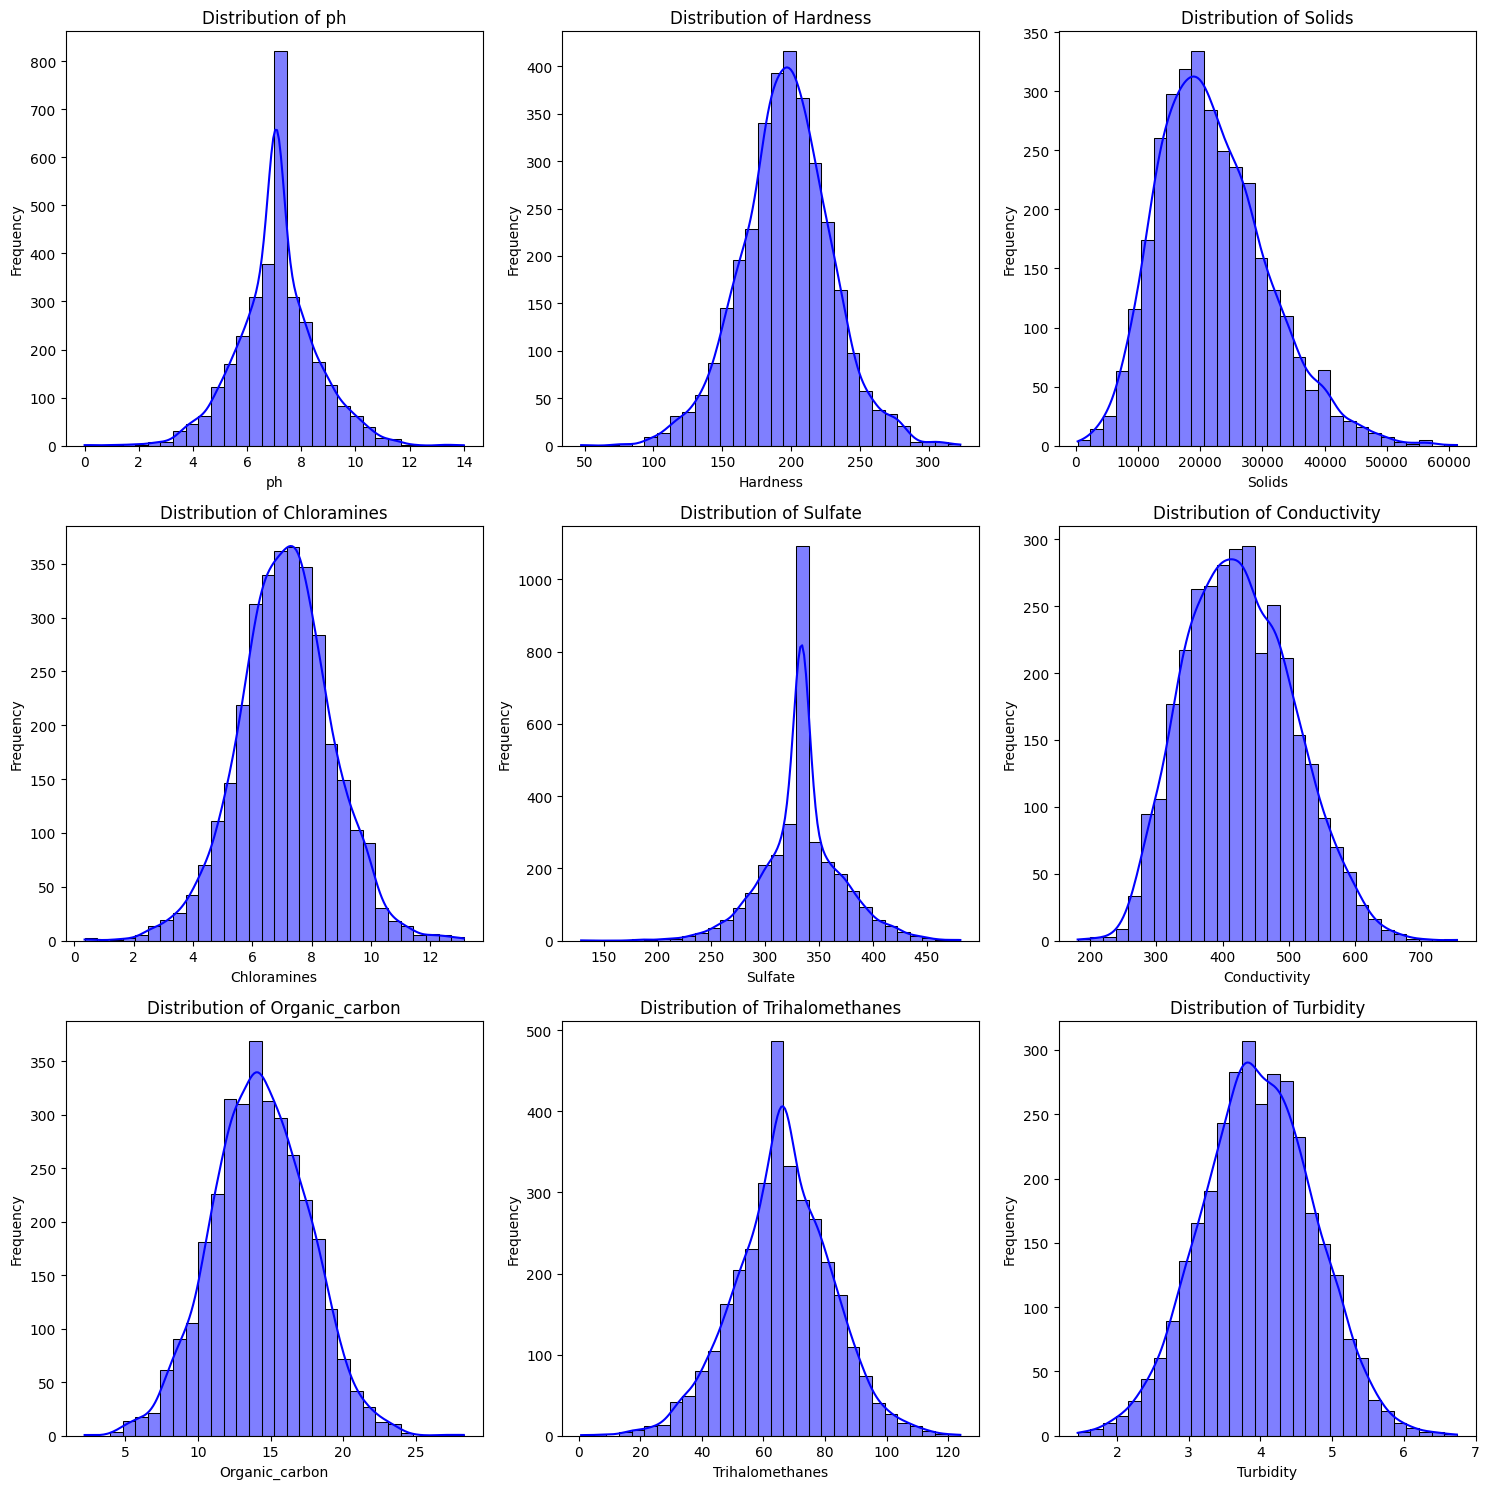

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib to use plotting functions
import numpy as np
import seaborn as sns # Import seaborn for statistical data visualization

parameters = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
              'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Mengatur ukuran figure
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Membuat histogram untuk setiap parameter
# Use water_data_imputed instead of data
for i, param in enumerate(parameters):
    sns.histplot(water_data_imputed[param], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('Frequency')

# Mengatur layout
plt.tight_layout()
plt.show()

**KONTRUKSI DATA**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/water_potability.csv')

# Mengecek tipe data
print(data.dtypes)
# Mengecek tipe data
print(data.dtypes)


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


**PERMODELAN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = water_data_imputed

X = data.drop('Potability', axis=1)
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.63


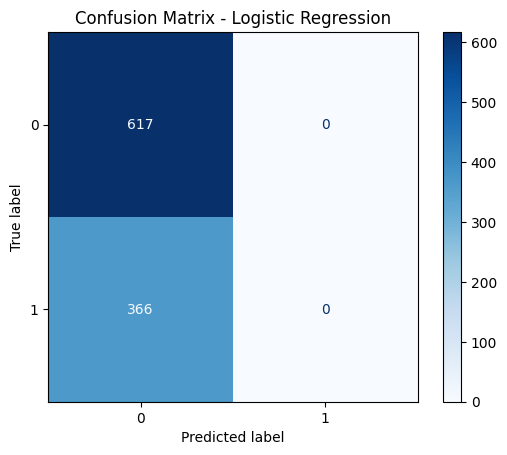

Random Forest Accuracy: 0.69


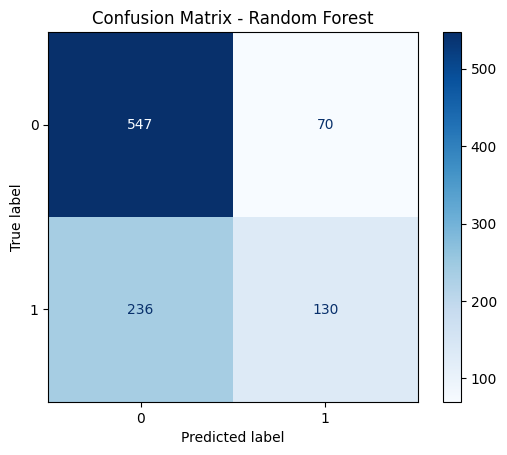

SVM Accuracy: 0.63


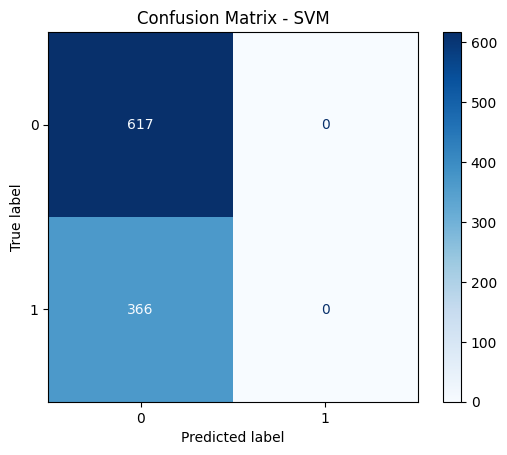

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = water_data_imputed

X = data.drop('Potability', axis=1)
y = data['Potability']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Daftar model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Membandingkan model
for name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)
    # Akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


**EVALUASI**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/drive/MyDrive/water_potability.csv')

X = data.drop('Potability', axis=1)
y = data['Potability']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Daftar model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

**DEPLOYMENT**

In [ ]:
corr = water_data.corr()
target_corr = corr['Potability'].sort_values(ascending=False)
print("kolerasi fitur dengan Potability:\n", target_corr)

kolerasi fitur dengan Potability:
 Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64
